# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement based on the Ridge regression example, the Lasso regression.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

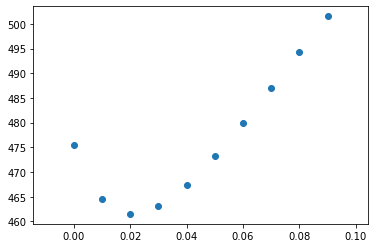

In [2]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

#x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alphas = [item/100 for item in range(0,10)] # change here

# add 1-3 line of code here
errors = []
for alpha in alphas:
    error= 0
    for index in range(len(x)):
        xk = x[index]
        yk = y[index]
        xx = np.delete(x,index).reshape(-1, 1)
        yy = np.delete(y,index).reshape(-1, 1)
        xx = np.asmatrix(np.c_[np.ones((len(xx),1)),xx])
        w = np.linalg.inv(xx.T*xx + alpha * I)*xx.T*yy
        w=w.ravel()
        error += (yk-(w[0,1]*xk+w[0,0]))**2
    errors.append(error/15)
    
# add 1-3 lines to compare the results
plt.scatter(alphas, errors)
plt.show()

So alpha = 0.02 seems to be the best choice - the smallest error.

## 2. Implement based on the Ridge regression example, the Lasso regression.

You need only update the compare the results with the sklearn results. You should get
[1.61776499, -180.8579086].

In [3]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alpha = 0.1 

We need to minimize the loss function for the chosen method (Lasso in this case). So, calculate $\partial_w loss(w) = 0$;
where $loss(w)$ is the equation from 021_Linear_regression.ipynb (in the 'Lasso regression' section of the notebook.) 

Calculations on paper lead to the following formula.
I don't know why the obtained result differs from the expected one.

In [4]:
w = np.linalg.inv(x.T*x)*(x.T*y+np.array([alpha/2, -alpha/2]).reshape(-1,1)) # update this line
w=w.ravel()
display(w)

matrix([[-180.53255041,    1.61592625]])

## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris_df['species']=iris_data['target']

In [9]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


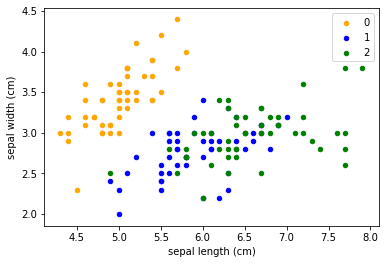

In [10]:
fig = iris_df[iris_df.species==0].plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)',color='orange', label='0')
iris_df[iris_df.species==1].plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)',color='blue', label='1',ax=fig)
iris_df[iris_df.species==2].plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)',color='green', label='2', ax=fig)
fig=plt.gcf()
plt.show()

In [11]:
# x = iris_df['sepal width (cm)'].values # change here
# y = iris_df['sepal length (cm)'].values # change here

# dataset_size = np.size(x)

# mean_x, mean_y = np.mean(x), np.mean(y)

# SS_xy = np.sum(y * x) - dataset_size * mean_y * mean_x
# SS_xx = np.sum(x * x) - dataset_size * mean_x * mean_x

# a = SS_xy / SS_xx
# b = mean_y - a * mean_x


# y_pred = a * x + b

Further formulas are based on deriving from: https://www.doc.ic.ac.uk/~dfg/ProbabilisticInference/IDAPISlides15.pdf

In [12]:
#The method should work for any number of features in x, so I choose all.
x = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
#x = iris_df[['sepal length (cm)','sepal width (cm)']]
y = iris_df.species

In [13]:
# mean_vector replaces mean_x and mean_y
mean_vectors = []
for species in range(0,3):
    mean_vectors.append(np.mean(x[y==species], axis=0).values)
mean_vectors

[array([5.006, 3.428, 1.462, 0.246]),
 array([5.936, 2.77 , 4.26 , 1.326]),
 array([6.588, 2.974, 5.552, 2.026])]

In [14]:
#SS_1 and SS_2 replace SS_xy and SS_xx
SS_1 = np.zeros((x.shape[1], x.shape[1]))
for i in range(3):
    for row in x[y == i].values:
        row = row.reshape(-1,1)
        mean_vector = mean_vectors[i].reshape(-1,1)
        SS_1 += (row - mean_vector).dot((row - mean_vector).T)
SS_1

array([[38.9562, 13.63  , 24.6246,  5.645 ],
       [13.63  , 16.962 ,  8.1208,  4.8084],
       [24.6246,  8.1208, 27.2226,  6.2718],
       [ 5.645 ,  4.8084,  6.2718,  6.1566]])

In [15]:
m = x.mean().values
m = m.reshape(-1,1)

SS_2 = np.zeros((x.shape[1], x.shape[1]))
for i in range(len(mean_vectors)):
    n = len(x[y == i])
    mean_vector = mean_vectors[i].reshape(-1,1)
    SS_2 += n*(mean_vector - m).dot((mean_vector - m).T)
SS_2

array([[ 63.21213333, -19.95266667, 165.2484    ,  71.27933333],
       [-19.95266667,  11.34493333, -57.2396    , -22.93266667],
       [165.2484    , -57.2396    , 437.1028    , 186.774     ],
       [ 71.27933333, -22.93266667, 186.774     ,  80.41333333]])

In [16]:
eig_values, eig_vectors = np.linalg.eig(np.linalg.inv(SS_1).dot(SS_2))

In [17]:
W = eig_vectors.real[:, :2]
x_lda = x.dot(W)
x_lda.columns = ['lda_1','lda_2']
x_lda

,lda_1,lda_2
0,1.499210,-1.886754
1,1.264360,-1.592143
2,1.355253,-1.733415
3,1.184956,-1.623588
4,1.516956,-1.944762
...,...,...
145,-1.950586,-2.260018
146,-1.833442,-1.706831
147,-1.780129,-2.027876
148,-2.011277,-2.440884


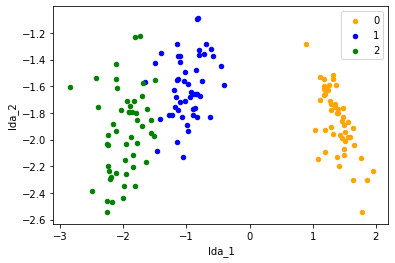

In [18]:
fig = x_lda[iris_df.species==0].plot(kind='scatter',x='lda_1',y='lda_2',color='orange', label='0')
x_lda[iris_df.species==1].plot(kind='scatter',x='lda_1',y='lda_2',color='blue', label='1',ax=fig)
x_lda[iris_df.species==2].plot(kind='scatter',x='lda_1',y='lda_2',color='green', label='2', ax=fig)
fig=plt.gcf()
plt.show()

Result agrees with one obtained using scikit-learn: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html.

In further fields, there are several checks of the received classification.

In [19]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

model.fit(x_lda.values)
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
(pd.Series(model.labels_).apply(lambda x: 0 if x==1 else 1 if x==0 else 2) == y).mean()

0.98

In [21]:
W = eig_vectors.real[:, :1]
x_lda = x.dot(W)
x_lda.columns = ['lda_1']
x_lda

,lda_1
0,1.499210
1,1.264360
2,1.355253
3,1.184956
4,1.516956
...,...
145,-1.950586
146,-1.833442
147,-1.780129
148,-2.011277


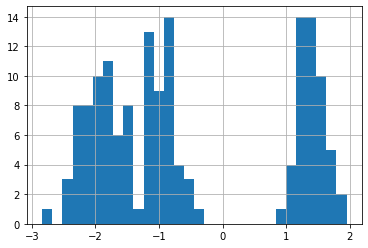

In [22]:
x_lda["lda_1"].hist(bins=30)

In [23]:
lda_quantiles = pd.qcut(x=x_lda["lda_1"], q=3, duplicates="drop", labels=[2,1,0])
lda_quantiles

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: lda_1, Length: 150, dtype: category
Categories (3, int64): [2 < 1 < 0]

In [24]:
(lda_quantiles == y).mean()

0.9866666666666667